In [25]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from tqdm import tqdm

from FFT import FFT, IFFT
from utils import re_scale, freq_padding, blockshaped

In [2]:
image_path_list = ['baboon', 'F16', 'lena', 'Noisy']
image_list = [np.fromfile("./data/"+path+".raw", dtype=np.uint8).reshape(512, 512) for path in image_path_list]

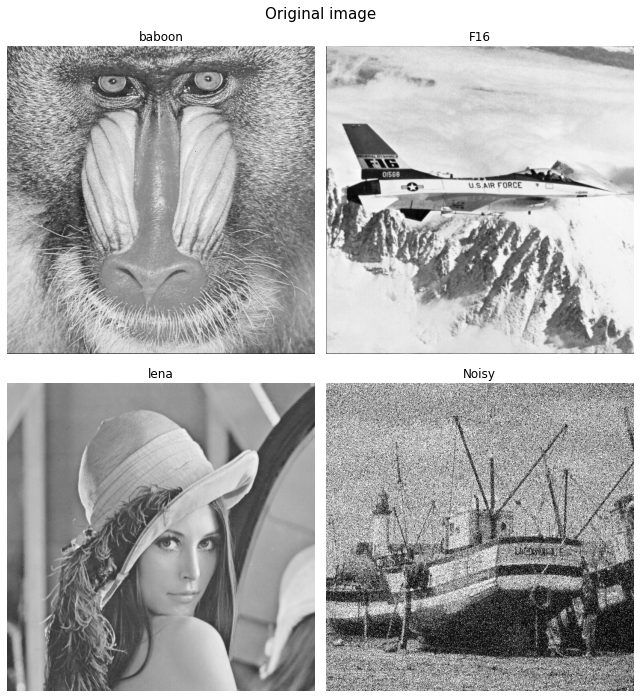

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,10))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.real(image_list[i]).astype(np.uint8), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Original image", size=15)
fig.tight_layout()
plt.show()

In [3]:
padding_image_list = []
for sub_image in image_list:
    padding_image_list.append(freq_padding(sub_image))

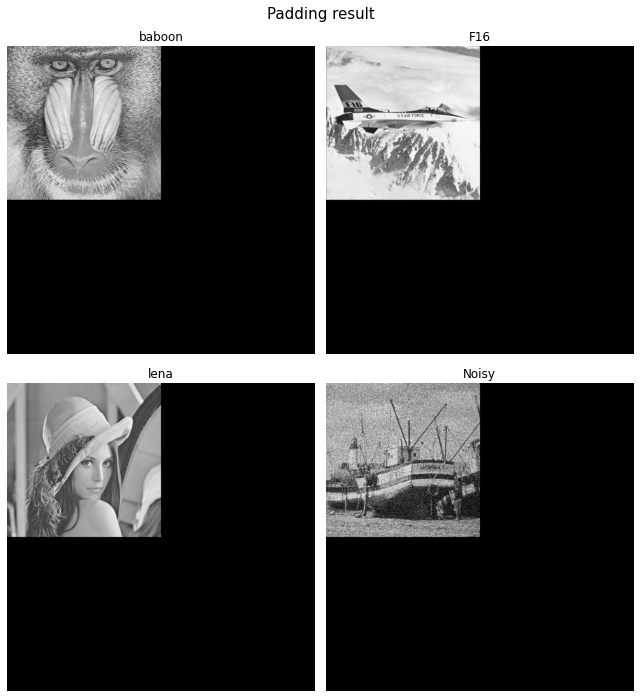

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9,10))
for i, ax_i in enumerate(axs.flat):
    ax_i.imshow(np.real(padding_image_list[i]).astype(np.uint8), cmap='gray')
    ax_i.axis("off")
    ax_i.set_title(image_path_list[i])

fig.suptitle("Padding result", size=15)
fig.tight_layout()
plt.show()

In [ ]:
freq_map_list = []
for sub_image in tqdm(padding_image_list):
    freq_map_list.append(FFT(sub_image))

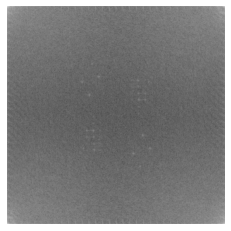

In [23]:
plt.imshow(np.log(abs(freq_map_list[0])), cmap='gray')
plt.axis("off")
plt.show()

In [37]:
block_array = blockshaped(freq_map_list[0], nrows=int(freq_map_list[0].shape[0]/2), ncols=int(freq_map_list[0].shape[1]/2))

In [40]:
for i in range(4):
    block_array[i] = np.flip(block_array[i], (0,1))

In [49]:
block_array_list = list(map(lambda x: x[0,:,:], np.split(block_array,4,axis=0)))

In [53]:
np.block([block_array_list[:2], block_array_list[2:]])

array([[ 2388.72446595-1.96149381e+02j, -4331.49061281+1.78666166e+03j,
         -109.67523276-4.38362061e+03j, ...,
         2974.6848304 -7.78897530e+02j,   170.65257122+4.32377868e+03j,
        -4020.17583504-1.23425416e+03j],
       [ 1013.64996662+1.38180043e+03j, -2870.36135731-1.55802930e+03j,
           71.43387704-1.14758557e+03j, ...,
         -917.67319491-2.72987916e+02j, -3101.90143471+1.33713142e+03j,
        -1175.40382901-3.95298885e+03j],
       [   99.09833766-5.05542646e+02j,  -597.25282432-1.03642745e+01j,
        -1889.51864221-3.22265298e+03j, ...,
         2258.70869387-9.45205846e+02j, -1578.7249337 +1.05345662e+02j,
          233.12331366-1.69023253e+03j],
       ...,
       [-3101.90143471-1.33713142e+03j,  -917.67319491+2.72987916e+02j,
        -1823.81039862-2.06016609e+03j, ...,
        -2870.36135731+1.55802930e+03j,  1013.64996662-1.38180043e+03j,
        -1175.40382901+3.95298885e+03j],
       [  170.65257122-4.32377868e+03j,  2974.6848304 +7.78897530e+0

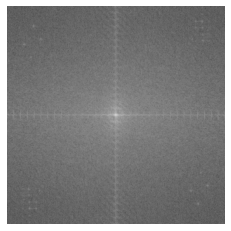

In [54]:
plt.imshow(np.log(abs(np.block([block_array_list[:2], block_array_list[2:]]))), cmap='gray')
plt.axis("off")
plt.show()